In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC

mat=sio.loadmat('ex6data3.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [24]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [25]:
X,y=mat['X'],mat['y']
Xval,yval=mat['Xval'],mat['yval']

In [26]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c=y.flatten(),cmap='jet')
    plt.xlabel('x1')
    plt.ylabel('y')

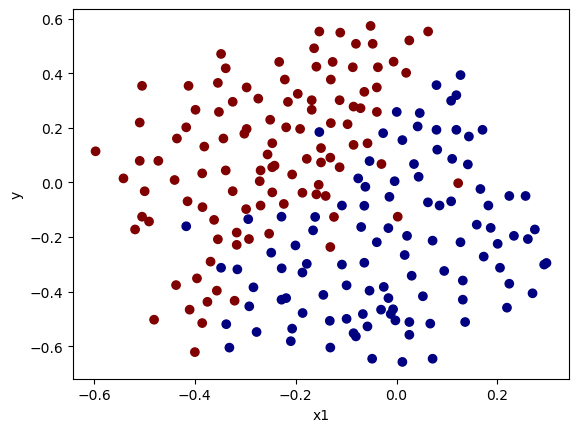

In [27]:
plot_data()

In [28]:
Cvalues=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gammas=[0.01,0.03,0.1,0.3,1,3,10,30,100]

In [29]:
best_score=0
best_params=(0,0)

for c in Cvalues:
    for gamma in gammas:
        svc=SVC(C=c,kernel='rbf',gamma=gamma)
        svc.fit(X,y.flatten())
        score=svc.score(Xval,yval.flatten())
        if score>best_score:
            best_score=score
            best_params=(c,gamma)
        
print(best_score,best_params)

0.965 (0.3, 100)


In [30]:
svc2=SVC(C=0.3,kernel='rbf',gamma=100)
svc2.fit(X,y.flatten())

SVC(C=0.3, gamma=100)

In [31]:
def plot_boundary(model):
    x_min,x_max=-0.6,0.4
    y_min,y_max=-0.7,0.6
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))
    z=model.predict(np.c_[xx.flatten(),yy.flatten()])

    zz=z.reshape(xx.shape)

    plt.contour(xx,yy,zz)

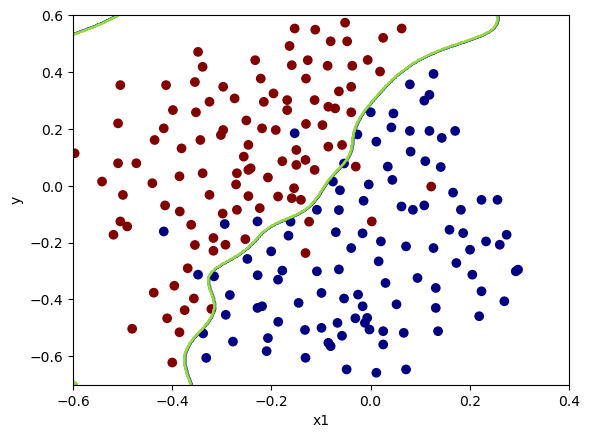

In [32]:
plot_boundary(svc2)
plot_data()